In [1]:
import pandas as pd
import numpy as np
import random
from preprocess_df import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import LocallyLinearEmbedding

In [2]:
#normal_data
normal_df = pd.read_csv('../data/normal1.csv')
processed_normal = process_df(normal_df)

# attack_data
attack_df = pd.read_csv('../data/attack1.csv')
processed_attack = process_df(attack_df)

In [3]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=30, n_iter=5)
svd_normal = svd.fit_transform(processed_normal.values)
svd_attack = svd.fit_transform(processed_attack.values)

In [4]:
from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(
    svd_normal, test_size=0.2, random_state=42)

In [5]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation

# model = Sequential()
# model.add(Dense(20, input_dim=svd_normal.shape[1], activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(3, activation='relu')) # size to compress to
# model.add(Dense(10, activation='relu'))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(svd_normal.shape[1])) # Multiple output neurons
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(x_normal_train,x_normal_train,verbose=1,epochs=30)

In [6]:
# model.save('svd_auto4')
import keras
model = keras.models.load_model('svd_auto4')

Metal device set to: Apple M1 Pro


2022-03-27 18:37:17.141301: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-27 18:37:17.141396: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))

2022-03-27 18:37:17.406492: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-27 18:37:17.438393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.5421752502873938


In [8]:
pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))

0.5443366359250491


In [9]:
pred_attack = model.predict(svd_attack)

score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(svd_attack[index],pred_attack[index])))

attack_df['score'] = score_list

Text(0, 0.5, 'Number of packets')

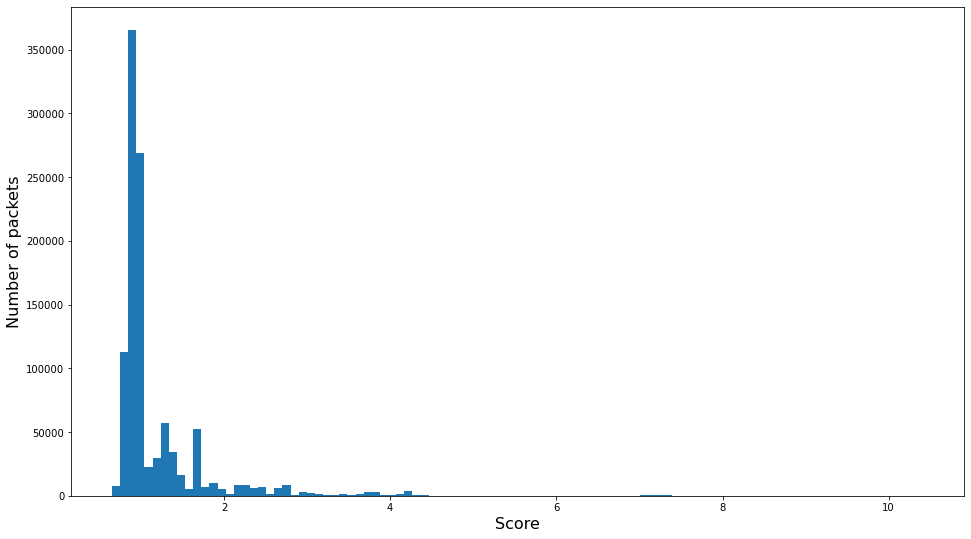

In [10]:
plt.figure(figsize=(16,9))
plt.hist(score_list,bins = 100)
plt.xlabel("Score", fontsize = 16)
plt.ylabel("Number of packets",fontsize = 16)

In [11]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']

Text(0, 0.5, 'Number of packets')

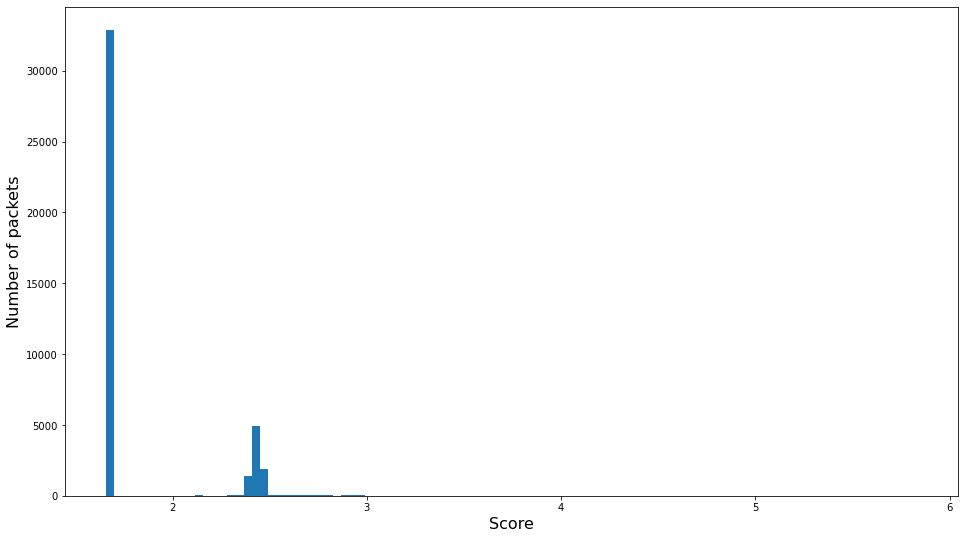

In [12]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']
plt.figure(figsize=(16,9))
plt.hist(list(nmap_df['score']),bins = 100)
plt.xlabel("Score", fontsize = 16)
plt.ylabel("Number of packets",fontsize = 16)

In [13]:
nmap_df['score'].min()

1.6552165764345115

<AxesSubplot:>

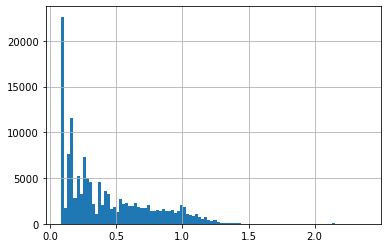

In [14]:
pred_normal = model.predict(svd_normal)
normal_score_list = []
#RMSE
for index, x in enumerate(pred_normal):
    normal_score_list.append(np.sqrt(metrics.mean_squared_error(svd_normal[index], pred_normal[index])))

normal_df['score'] = normal_score_list
normal_df['score'].hist(bins = 100)

In [15]:
attack_df['score'].describe().apply(lambda x: format(x, 'f'))

count    1070554.000000
mean           1.167244
std            0.607333
min            0.652383
25%            0.863758
50%            0.949801
75%            1.235713
max           10.421036
Name: score, dtype: object

In [16]:
nmap_df['score'].describe().apply(lambda x: format(x, 'f'))

count    41824.000000
mean         1.834350
std          0.342711
min          1.655217
25%          1.658482
50%          1.666266
75%          1.671597
max          5.833351
Name: score, dtype: object

In [17]:
normal_wordpress = attack_df[attack_df["ip.dst"] == '89.100.107.147']

<AxesSubplot:>

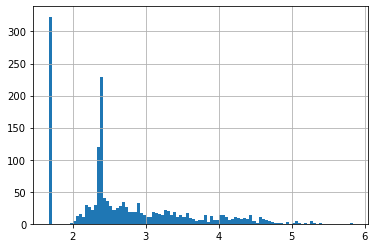

In [18]:
normal_wordpress['score'].hist(bins=100)

In [19]:

processed_normal.shape

(140538, 72)

In [20]:
from sklearn import metrics
a= np.array([[1],[2],[3],[4]])
b = np.array([[5],[6],[9],[8]])
np.sqrt(metrics.mean_squared_error(a, b, multioutput='raw_values'))

array([4.58257569])